In [119]:
# importing necessary library
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# loading the data-set

data = pd.read_csv(r"C:\Users\User\Desktop\Warranty-Claims-Fraud-Prediction\data\cleaned-data\df_Clean.csv")
data.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


# data preprocessing part 1

In [121]:
data.shape

(358, 21)

In [122]:
# dropping columns not needed in the dataset
data.drop (["Unnamed: 0"], axis=1, inplace=True)

In [123]:
# checking for the sum of  null values in each columns
data.isnull().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [124]:
# checking for duplicates
data.duplicated().sum()

0

In [125]:
# checking the data type of each columns
data.dtypes

Region               object
State                object
Area                 object
City                 object
Consumer_profile     object
Product_category     object
Product_type         object
AC_1001_Issue         int64
AC_1002_Issue         int64
AC_1003_Issue         int64
TV_2001_Issue         int64
TV_2002_Issue         int64
TV_2003_Issue         int64
Claim_Value         float64
Service_Centre        int64
Product_Age           int64
Purchased_from       object
Call_details        float64
Purpose              object
Fraud                 int64
dtype: object

In [126]:
# checking for unique values in each columns
data.nunique()

Region                8
State                20
Area                  2
City                 27
Consumer_profile      2
Product_category      2
Product_type          2
AC_1001_Issue         3
AC_1002_Issue         3
AC_1003_Issue         3
TV_2001_Issue         3
TV_2002_Issue         3
TV_2003_Issue         3
Claim_Value         107
Service_Centre        7
Product_Age         188
Purchased_from        3
Call_details         37
Purpose               3
Fraud                 2
dtype: int64

In [127]:
data['AC_1001_Issue'].unique()


array([0, 1, 2], dtype=int64)

In [128]:
data['AC_1002_Issue'].unique()

array([0, 1, 2], dtype=int64)

In [129]:
data['AC_1003_Issue'].unique()

array([0, 2, 1], dtype=int64)

In [130]:
data["AC_1001_Issue"] = data["AC_1001_Issue"].map({ 0: "No issues", 1: "Repair", 2: "Replacement"})


In [131]:
data["AC_1002_Issue"] = data["AC_1002_Issue"].map({0: "No issues", 1: "Repair", 2: "Replacement"})

In [132]:
data["AC_1003_Issue"] = data["AC_1003_Issue"].map({0: "No issues", 1: "Repair", 2: "Replacement"})

In [133]:
data["TV_2001_Issue"].unique()

array([1, 0, 2], dtype=int64)

In [134]:
data["TV_2001_Issue"] = data["TV_2001_Issue"].map({0: "No issues", 1: "Repair", 2: "Replacement"})

In [135]:
data["TV_2002_Issue"] = data["TV_2002_Issue"].map({0: "No issues", 1: "Repair", 2: "Replacement"})

In [136]:
data["TV_2003_Issue"] = data["TV_2003_Issue"].map({0: "No issues", 1: "Repair", 2: "Replacement"})

In [137]:
data.describe()

,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,358.000000,358.000000,358.000000,358.000000,358.000000
mean,11994.534916,12.812849,201.843575,11.931844,0.097765
std,12063.213579,1.766844,259.731564,11.559474,0.297413
min,0.000000,10.000000,3.000000,0.500000,0.000000
25%,4006.000000,12.000000,14.000000,1.600000,0.000000
50%,7194.000000,13.000000,60.000000,6.500000,0.000000
75%,15000.000000,15.000000,303.750000,23.000000,0.000000
max,50000.000000,16.000000,991.000000,30.000000,1.000000


In [138]:
data.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,No issues,No issues,No issues,Repair,Replacement,No issues,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,Repair,Repair,No issues,No issues,No issues,No issues,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,No issues,Repair,Replacement,No issues,No issues,No issues,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,No issues,No issues,No issues,Repair,Repair,No issues,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,No issues,No issues,No issues,No issues,Repair,Replacement,25000.0,15,6,Dealer,1.3,Claim,0


## Exploratory data analysis

### Location Based distibution of fraudulent claims

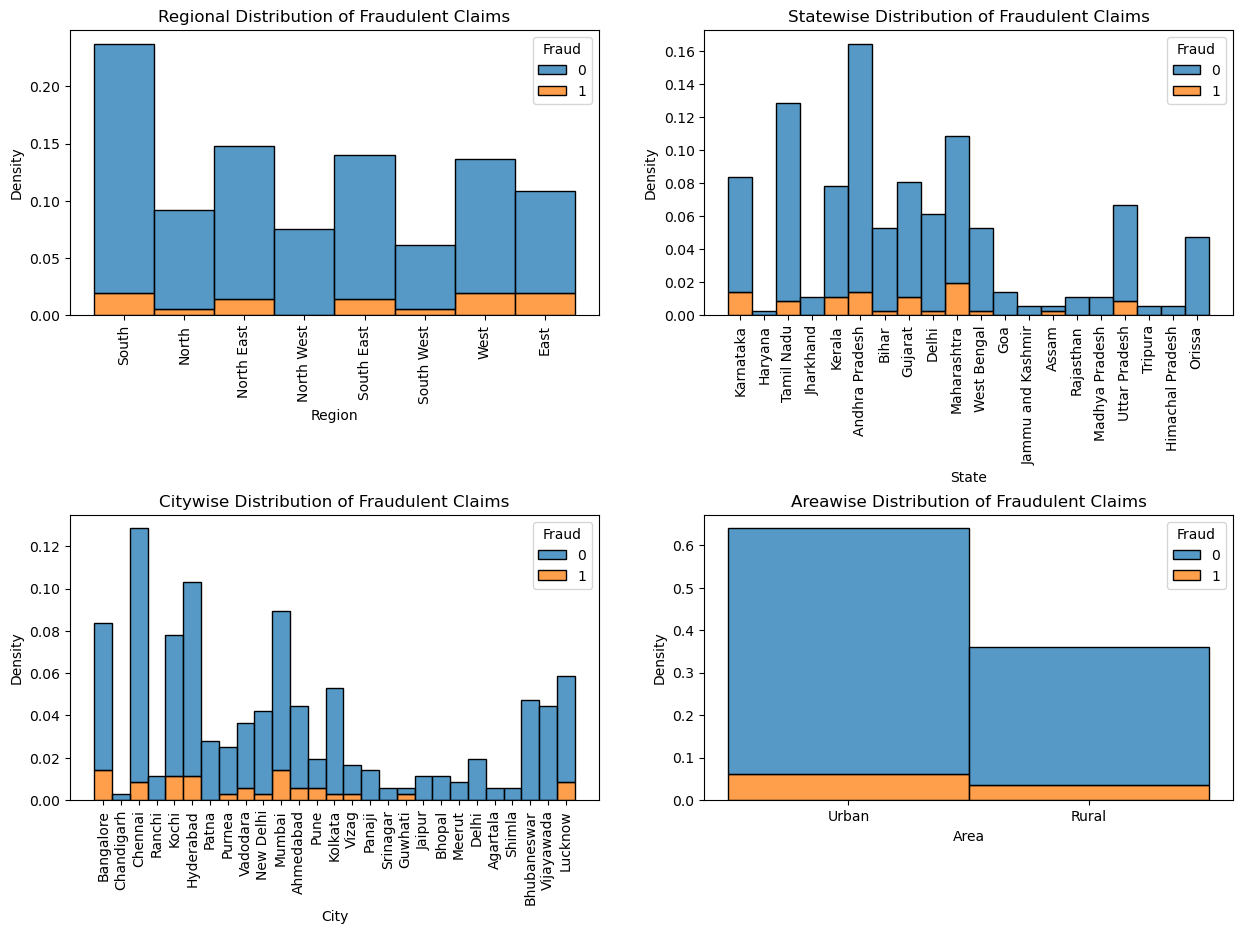

In [139]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
fig.subplots_adjust(hspace=0.7)

sns.histplot(x = 'Region', data = data, ax =ax[0,0], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Regional Distribution of Fraudulent Claims')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'State', data = data, ax =ax[0,1], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Statewise Distribution of Fraudulent Claims')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'City', data = data, ax =ax[1,0], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Citywise Distribution of Fraudulent Claims')
ax[1,0].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'Area', data = data, ax =ax[1,1], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Areawise Distribution of Fraudulent Claims')
plt.show()


<p>
The above plots visualizes the distribution of fraudulent claims based on location. The first graphs shpws the regional distribution of the fraudent claims, where South, North East and south East are among the regionas with highest warranty claims. However, the regions - West, East and South are among regions with highest fraudulent claims. Interestingly the North West region has zero fraudent claims.

The second graph shows the distribution of fraudulent claims based on the States, where the states - Andhra Pradesh, Maharashtra, Tamil Nadu, Karnataka and Gujarat are among the states with highest number of warranty claims and states - Haryana has lowest warranty claims. The states - Andhra Pradesh, Maharashtra, Tamil Nadu, Karnataka and Gujarat are among the states with highest number of fraudulent claims whereas, states like Bihar, Delhi, West Bengal and Assam are among the states with lowest number of fraudulent claims.

The third graph shows the distribution of fraudulent claims based on cities. The cities - Chennai, Hyderabad, Bangalore, Mumbai and Kochi are among the cities with highest claims whereas cities like Chandigarh, Srinagar, Agartala and Shimla have lowest number of claims. Moreover the cities - Chennai, Hyderabad, Bangalore, Mumbai and Kochi are among the cities with highest fraudulent claims whereas cities like Chandigarh, Panaji, Meerut, Jaipur, and many other have zero fraudulent claims.

The forth graph, visualizes the fraudulent claims based on the area, where the urban area has more number of claims and ultimately more number of fraudulent claims in comparison to rural areas.
</p>

In [140]:
data.columns

Index(['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Service_Centre', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose', 'Fraud'],
      dtype='object')

In [141]:
data["Consumer_profile"]

0      Business
1      Business
2      Personal
3      Business
4      Personal
         ...   
353    Personal
354    Personal
355    Personal
356    Personal
357    Personal
Name: Consumer_profile, Length: 358, dtype: object

## consumer profile distribution and fraudulent claims

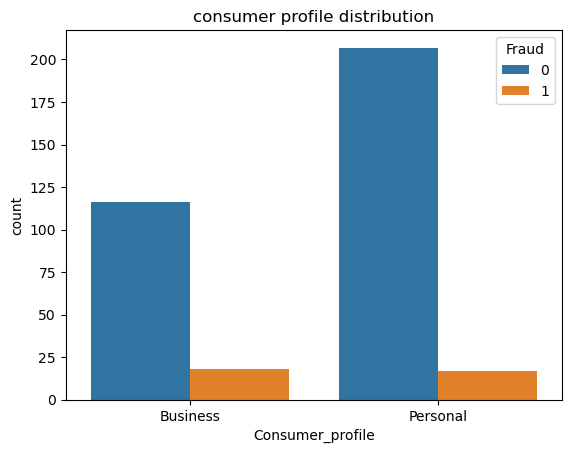

In [142]:
sns.countplot(x = "Consumer_profile", data=data, hue= "Fraud").set_title("consumer profile distribution")
plt.show()

<P>
From this graph, it is clear that majority of the claims are from consumer who purchased the products for personal use. However,the consumers who purchases the products for business purpose have higher number of fraudulent warranty claims.
</P>

In [143]:
data["Product_category"]

0      Entertainment
1          Household
2          Household
3      Entertainment
4      Entertainment
           ...      
353    Entertainment
354    Entertainment
355    Entertainment
356        Household
357        Household
Name: Product_category, Length: 358, dtype: object

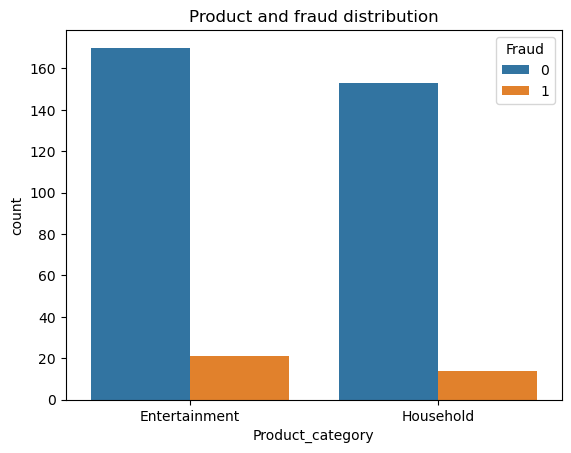

In [144]:
sns.countplot(x = 'Product_category', data = data, hue="Fraud").set_title("Product and fraud distribution")
plt.show()

##
 from the graph the product category that requested for warranty claims the most is the entertainment category, and the category with the most fraudulent claim is also the entertainment category

In [145]:
data["Product_type"]

0      TV
1      AC
2      AC
3      TV
4      TV
       ..
353    TV
354    TV
355    TV
356    AC
357    AC
Name: Product_type, Length: 358, dtype: object

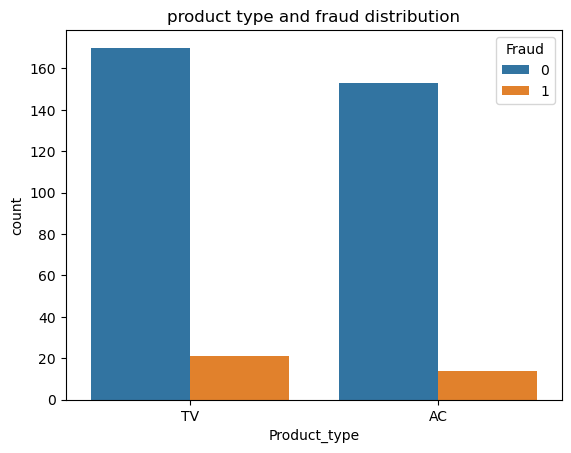

In [146]:
sns.countplot(x = "Product_type", data=data, hue="Fraud").set_title("product type and fraud distribution")
plt.show()

## from the graph, we can see that product type with the most warranty claim is the TV 
## and it also has a high amount of Fraudulent claim

In [147]:
data["AC_1001_Issue"]

0        No issues
1           Repair
2        No issues
3        No issues
4        No issues
          ...     
353      No issues
354      No issues
355      No issues
356         Repair
357    Replacement
Name: AC_1001_Issue, Length: 358, dtype: object

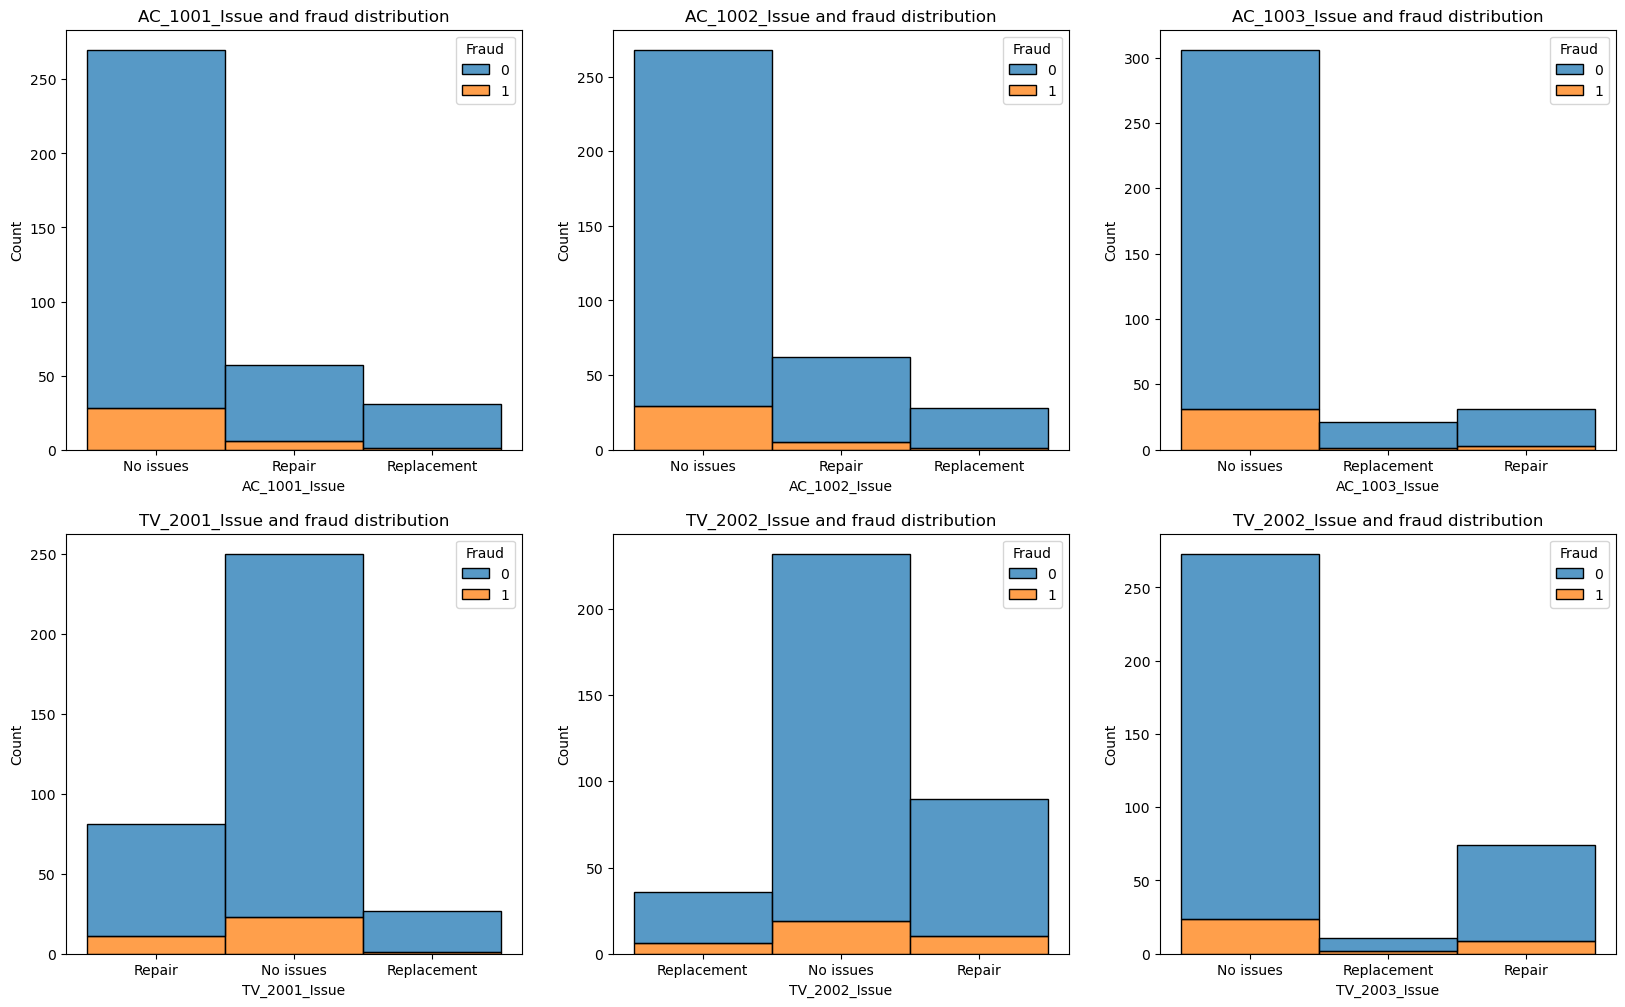

In [155]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
sns.histplot(x = "AC_1001_Issue", hue="Fraud", data=data,multiple="stack",  ax=ax[0,0]).set_title("AC_1001_Issue and fraud distribution")
sns.histplot(x = "AC_1002_Issue", hue="Fraud", data=data,multiple="stack", ax=ax[0,1]).set_title("AC_1002_Issue and fraud distribution")
sns.histplot(x = "AC_1003_Issue", hue="Fraud", data=data,multiple="stack",  ax=ax[0,2]).set_title("AC_1003_Issue and fraud distribution")
sns.histplot(x = "TV_2001_Issue", hue="Fraud", data=data,multiple="stack", ax=ax[1,0]).set_title("TV_2001_Issue and fraud distribution")
sns.histplot(x = "TV_2002_Issue", hue="Fraud", data=data,multiple="stack", ax=ax[1,1]).set_title("TV_2002_Issue and fraud distribution")
sns.histplot(x = "TV_2003_Issue", hue="Fraud", data=data,multiple="stack", ax=ax[1,2]).set_title("TV_2002_Issue and fraud distribution")
plt.show()

<p>
The above graphs visualizes the issue with the product parts and fradulent warranty claims on them. In the product AC the parts AC_1001 and AC_1002 has increases number of repairs whereas as the AC_1003 has considerable less instances of repair or replacement as compared to other two, so the company should focus on improving the AC_1001 and AC_1002 parts. Moreover, in all three parts, fradulent claims usually occurs when there is no issue with the product.

In the product TV the parts TV_2001 and TV_2002 has increases number of repairs whereas as the TV_1003 has considerable less instances of repair and negligible instances of replacement as compared to other two, however in contrast to AC, the fradulent claims usually occurs when there is issue with the product as well as when the product parts especially TV_2001 and TV_2002 requires repair or replacement. So the company should focus on improving the TV_2001 and TV_2002 parts, in order to reduce the number of fradulent claims. </p>

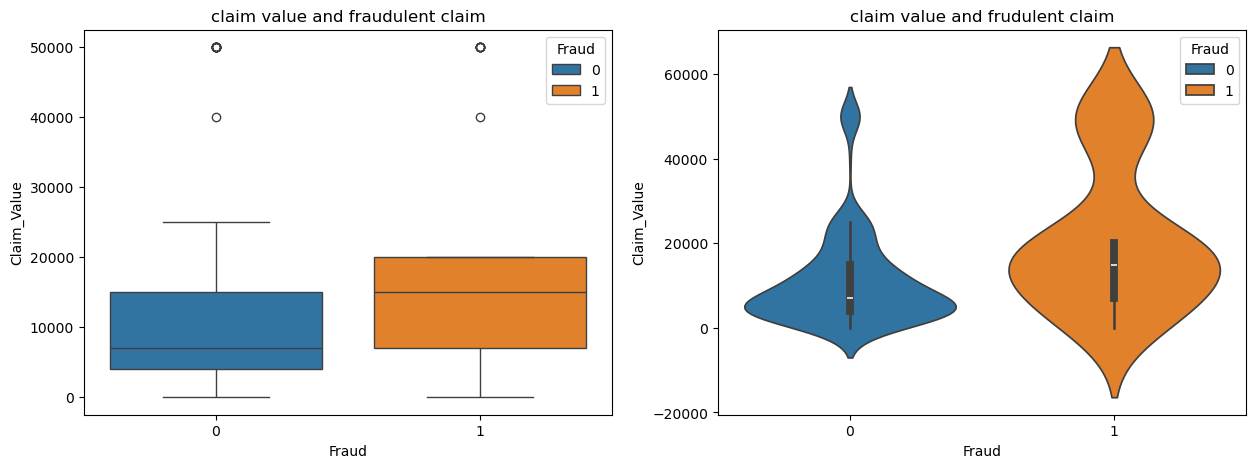

In [176]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x= "Fraud", hue = "Fraud", data=data, y = "Claim_Value", ax=ax[0]).set_title("claim value and fraudulent claim")
sns.violinplot(x = "Fraud", hue= "Fraud", data=data, y = "Claim_Value", ax=ax[1]).set_title("claim value and frudulent claim")
plt.show()


<p>
As expected, these graphs shows that the claim value for fradulent clains tends to be higher than the genuine claims. In the boxplot, the medianclaim value of fraudulent claims is way higher than the genuine claims. In addtion to that, it is clear form the boxplot that the fraudulent claims are more spread out at higher claim values than the genuine claims.
</p>

In [177]:
data["Product_Age"]

0       60
1       10
2       10
3       20
4        6
      ... 
353      3
354     12
355    254
356     12
357    303
Name: Product_Age, Length: 358, dtype: int64

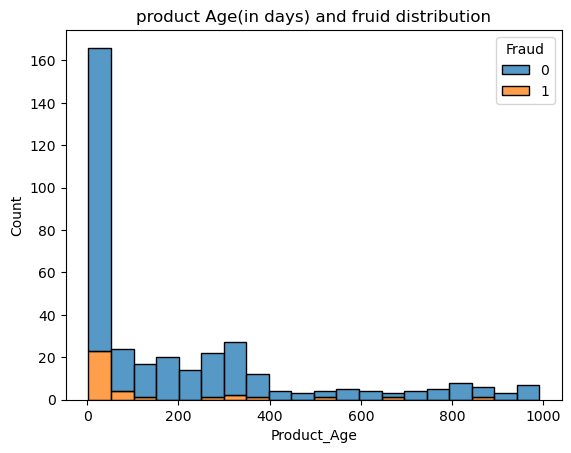

In [183]:
sns.histplot(x = "Product_Age", data=data, hue = "Fraud", multiple="stack", bins = 20).set_title("product Age(in days) and fruid distribution")
plt.show()

## from the graph above it can be seen that from 0 - 100 has the highest amount of frudulent claims , however the fraudulent claims are more frequent and they usually occur within 50days of purchase

In [185]:
data["Purchased_from"]

0      Manufacturer
1            Dealer
2            Dealer
3      Manufacturer
4            Dealer
           ...     
353    Manufacturer
354    Manufacturer
355          Dealer
356    Manufacturer
357        Internet
Name: Purchased_from, Length: 358, dtype: object

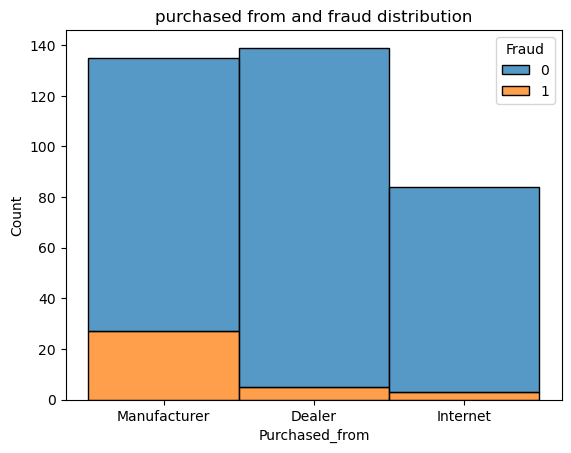

In [197]:

sns.histplot(x = "Purchased_from", hue="Fraud", data=data, multiple="stack" ).set_title("purchased from and fraud distribution")
plt.show()

## Maximum number of purchase is done through the dealer, but the maximum number of fraudulent claims are coming when the purchase is done through the manufacturer, whereas the internet has the lowest number of fraudulent claims. This much fradulent claims only from the manufacturer is a matter of concern for the company.

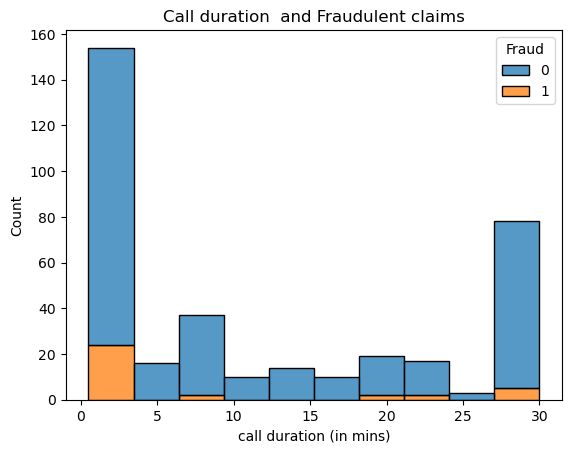

In [200]:
sns.histplot(x = "Call_details", hue="Fraud", data=data, multiple="stack").set_title("Call duration  and Fraudulent claims")
plt.xlabel("call duration (in mins)")
plt.show()

## This graph shows the relation of customer care call duration and the fraudulent claims. In order to make a warranty claims, customers contact the customer care. The duration of customer care calls are plotted in the histogram along with the authenciity of the claims. The histogram shows that the fraudulent claims are more frequent when the customer care call duration is less than 3-4 minutes. However, the genuine claims are more frequent when the customer care call duration is more than 4 minutes.

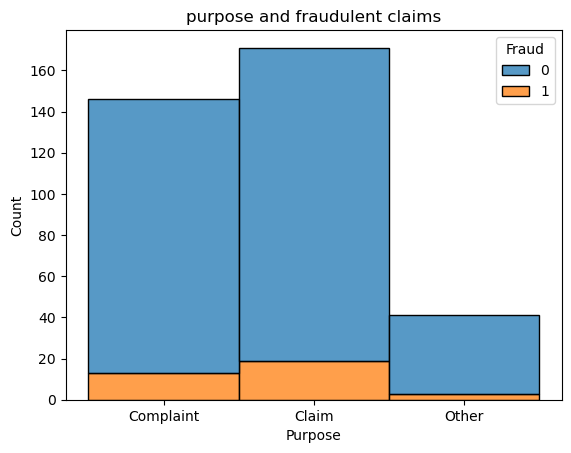

In [202]:
sns.histplot(x = "Purpose", data=data, hue="Fraud", multiple="stack").set_title("purpose and fraudulent claims")
plt.show()

## Most of the customer contact the customer care for the purpose of complaint and claim and very few with other reasons. However, the fraudulent claims are more frequent when the customer contact the customer care for the purpose of complaint and claim.

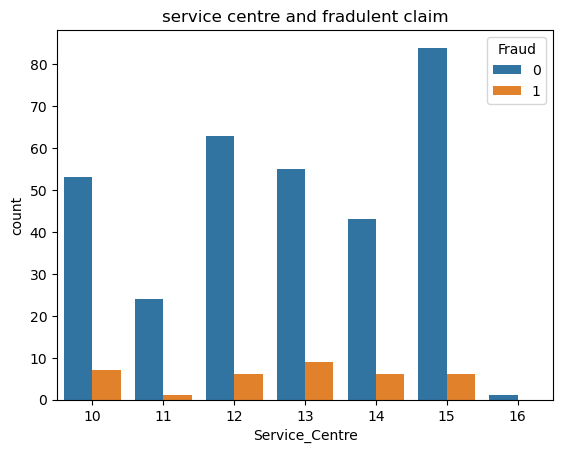

In [204]:
sns.countplot(x = "Service_Centre", data=data, hue="Fraud").set_title("service centre and fradulent claim")
plt.show()

## This graph shows the relation between the relationship between the service centre and the fraudulent warranty claims. The majorty of the replairs and replacements are done by the service centre 15,12 and 13. Where, the service centre 13 has the highest number of fradulent claims, followed by service centre 10. So, the company should survelliance the service centre 13 and 10 more closely.

In [209]:
data["Purpose"]

0      Complaint
1      Complaint
2          Claim
3      Complaint
4          Claim
         ...    
353    Complaint
354    Complaint
355        Claim
356        Claim
357    Complaint
Name: Purpose, Length: 358, dtype: object

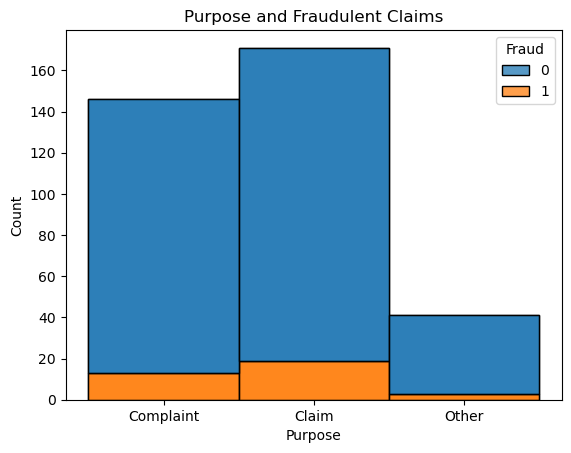

In [211]:
sns.histplot(x = "Purpose", data=data, multiple="stack", hue="Fraud").set_title("Purpose and Fraudulent Claims")
plt.show()

## Most of the customer contact the customer care for the purpose of complaint and claim and very few with other reasons. However, the fraudulent claims are more frequent when the customer contact the customer care for the purpose of complaint and claim.

In [212]:
data.columns

Index(['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Service_Centre', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose', 'Fraud'],
      dtype='object')

## DATA PREPROCESSING PART 2

# outlier remover

In [219]:
Q1 = data["Claim_Value"].quantile(0.25)
Q3 = data["Claim_Value"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data["Claim_Value"] < lower_bound) | (data["Claim_Value"] > upper_bound)]


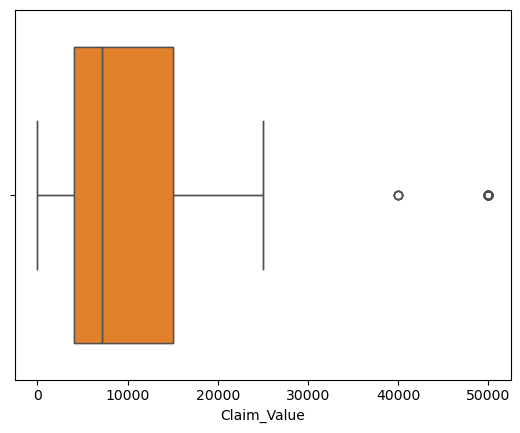

In [217]:
sns.boxplot(x = data["Claim_Value"])
plt.show()

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            358 non-null    object 
 1   State             358 non-null    object 
 2   Area              358 non-null    object 
 3   City              358 non-null    object 
 4   Consumer_profile  358 non-null    object 
 5   Product_category  358 non-null    object 
 6   Product_type      358 non-null    object 
 7   AC_1001_Issue     358 non-null    object 
 8   AC_1002_Issue     358 non-null    object 
 9   AC_1003_Issue     358 non-null    object 
 10  TV_2001_Issue     358 non-null    object 
 11  TV_2002_Issue     358 non-null    object 
 12  TV_2003_Issue     358 non-null    object 
 13  Claim_Value       358 non-null    float64
 14  Service_Centre    358 non-null    int64  
 15  Product_Age       358 non-null    int64  
 16  Purchased_from    358 non-null    object 
 1

# label encoding

In [232]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# cols for labelencoding

cols = data.select_dtypes(include=["object"]).columns

#label encoding

for col in cols:
    le.fit(data[col])
    data[col] = le.transform(data[col])
    print(col , data[col].unique())

State [10  6 16  9 11  0  2  5  3 13 19  4  8  1 15 12 18 17  7 14]
Area [1 0]
City [ 2  5  6 21 11  9 18 20 24 16 15  1 19 12 26 17 23  8 10  3 14  7  0 22
  4 25 13]
Consumer_profile [0 1]
Product_category [0 1]
Product_type [1 0]
AC_1001_Issue [0 1 2]
AC_1002_Issue [0 1 2]
AC_1003_Issue [0 2 1]
TV_2001_Issue [1 0 2]
TV_2002_Issue [2 0 1]
TV_2003_Issue [0 2 1]
Purchased_from [2 0 1]
Purpose [1 0 2]


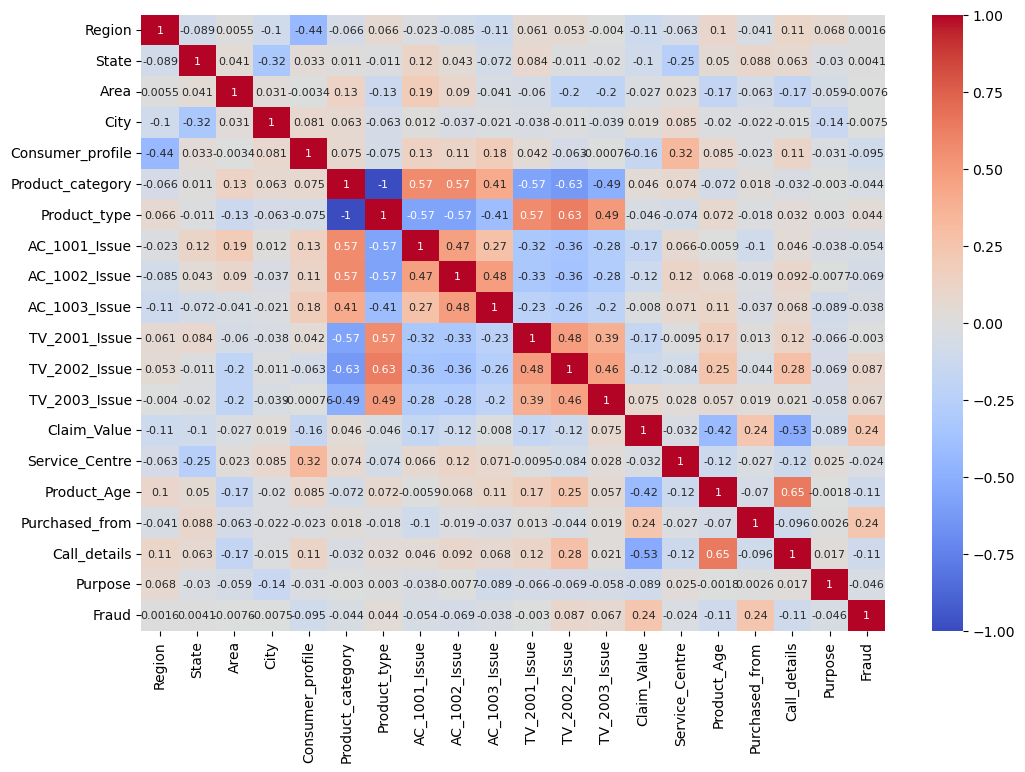

In [250]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", annot_kws={"size": 8})
plt.show()

### Train Test Split

In [252]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop("Fraud", axis=1), data["Fraud"], test_size=0.30, random_state=42)

### model building using logistic regression


In [256]:
from sklearn.linear_model import LogisticRegression

# logistic regression object
model = LogisticRegression()

# fitting the logistic regression to the training data
model.fit(X_train, Y_train)

# training accuracy
print(model.score(X_train, Y_train))

# prediction

pred_1 = model.predict(X_test)

0.892


c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### model building using decision tree classifier without hyperparameter tuning with GridSearchCV

In [259]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# train model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, Y_train)

#predict the model
pred_y = tree_model.predict(X_test)

print("Accuracy: ", tree_model.score(X_test, Y_test))
print(classification_report(Y_test, pred_y))
print(confusion_matrix(Y_test, pred_y))

Accuracy:  0.8518518518518519
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       100
           1       0.10      0.12      0.11         8

    accuracy                           0.85       108
   macro avg       0.51      0.52      0.52       108
weighted avg       0.87      0.85      0.86       108

[[91  9]
 [ 7  1]]


### model building using decision tree classifier with hyperparameter tuning uding gridsearchcv

In [261]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# define the parameter grid
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],   # Split criteria
    "max_depth": [3, 5, 7, 10, None],               # Tree depth
    "min_samples_split": [2, 5, 10],                # Minimum samples to split
    "min_samples_leaf": [1, 2, 4],                  # Minimum samples per leaf
    "max_features": [None, "sqrt", "log2"]          # features considered for split
}

# Grid search with 5-fold cross validation 

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring="accuracy",   # Could also use 'f1', 'recall' for fraud detection
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the grid search
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Evaluate on test set
best_tree = grid_search.best_estimator_
test_score = best_tree.score(X_test, Y_test)
print("Test Accuracy:", test_score)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.8960000000000001
Test Accuracy: 0.9259259259259259


### Training Model with Random Forest Classifier + GridSearchCV

In [267]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

# Grid search prioritizing recall for fraud detection
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='recall',   # Use 'f1' if you want balanced precision+recall
    n_jobs=-1
)

# Fit
grid_search.fit(X_train, Y_train)

# Best results
print("Best Parameters:", grid_search.best_params_)
print("Best CV Recall:", grid_search.best_score_)

# Predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Report
print(classification_report(Y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 50}
Best CV Recall: 0.11333333333333333
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       100
           1       0.20      0.25      0.22         8

    accuracy                           0.87       108
   macro avg       0.57      0.58      0.58       108
weighted avg       0.88      0.87      0.88       108

